# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.simplefilter('ignore', FitFailedWarning)

# Importing Dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# No Missing Values

In [4]:
df.isna().any().any()

np.False_

# Encoding Categorical Values

In [5]:
#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

# Seperating into X and y

In [6]:
y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

# Spliting into Train and Test Sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

### Sample Row

In [8]:
X_train.iloc[0].to_dict()

{'Age': 44,
 'BusinessTravel': 0,
 'DailyRate': 489,
 'Department': 1,
 'DistanceFromHome': 23,
 'Education': 3,
 'EducationField': 3,
 'EnvironmentSatisfaction': 2,
 'Gender': 1,
 'HourlyRate': 67,
 'JobInvolvement': 3,
 'JobLevel': 2,
 'JobRole': 2,
 'JobSatisfaction': 2,
 'MaritalStatus': 1,
 'MonthlyIncome': 2042,
 'MonthlyRate': 25043,
 'NumCompaniesWorked': 4,
 'OverTime': 0,
 'PercentSalaryHike': 12,
 'PerformanceRating': 3,
 'RelationshipSatisfaction': 3,
 'StockOptionLevel': 1,
 'TotalWorkingYears': 17,
 'TrainingTimesLastYear': 3,
 'WorkLifeBalance': 4,
 'YearsAtCompany': 3,
 'YearsInCurrentRole': 2,
 'YearsSinceLastPromotion': 1,
 'YearsWithCurrManager': 2}

# Feature Scaling

Standardization

In [9]:
standard_scaler = StandardScaler()

X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

X_standardized = standard_scaler.fit_transform(X)

Normalization

In [10]:
min_max_scaler = MinMaxScaler()

X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)

X_normalized = min_max_scaler.fit_transform(X)

# Hyper-parameter Tuning Using Grid Search CV

In [11]:
def tune_hyperparameters(model,X,y):
  param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"],"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)

### With Standardization

In [12]:
tune_hyperparameters(LogisticRegression(max_iter=100000),X_train_standardized,y_train)

Best Params:  {'C': np.float64(0.001), 'penalty': 'l2', 'solver': 'liblinear'}


c:\Users\mikku\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.84450864        nan 0.84450864 0.84450864
 0.84450864 0.8726924  0.84450864 0.84450864        nan        nan
 0.84450864        nan 0.84450864 0.85131423 0.85131423 0.86686242
 0.85131423 0.85131423        nan        nan 0.8649112         nan
 0.8649112  0.86685295 0.86685295 0.86394033 0.86685295 0.86685295
        nan        nan 0.86394033        nan 0.86394033 0.86685768
 0.86685768 0.86685768 0.86685768 0.86685768        nan        nan
 0.86686242        nan 0.86686242 0.86686242 0.86686242 0.86686242
 0.86686242 0.86686242        nan        nan 0.86686242        nan
 0.86686242 0.86686242 0.86686242 0.86686242 0.86686242 0.86686242
        nan        nan 0.86686242        nan 0.86686242 0.86686242
 0.86686242 0.86686242 0.86686242 0.86686242]
  warnings.warn(


### With Normalization

In [13]:
tune_hyperparameters(LogisticRegression(max_iter=100000),X_train_normalized,y_train)

Best Params:  {'C': np.float64(100.0), 'penalty': 'l2', 'solver': 'lbfgs'}


c:\Users\mikku\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.84450864        nan 0.84450864 0.84450864
 0.84450864 0.84450864 0.84450864 0.84450864        nan        nan
 0.84450864        nan 0.84450864 0.84450864 0.84450864 0.84450864
 0.84450864 0.84450864        nan        nan 0.84450864        nan
 0.84450864 0.85131423 0.85228984 0.85228984 0.85228984 0.85228984
        nan        nan 0.86199384        nan 0.86296472 0.86588207
 0.86588207 0.86685295 0.86588207 0.86588207        nan        nan
 0.86588207        nan 0.86685768 0.86491594 0.86589155 0.86491594
 0.86491594 0.86491594        nan        nan 0.86686242        nan
 0.86686242 0.86686242 0.86783329 0.86686242 0.86686242 0.86686242
        nan        nan 0.86686242        nan 0.86686242 0.86686242
 0.86783329 0.86686242 0.86686242 0.86686242]
  warnings.warn(


# Performing Logistic Regression

In [14]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()

### Without scaling

Accuracy:  0.854875283446712
Precision:  0.696969696969697
Recall:  0.2987012987012987
F1 Score:  0.41818181818181815
Confusion Matrix:
 [[354  10]
 [ 54  23]]


c:\Users\mikku\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


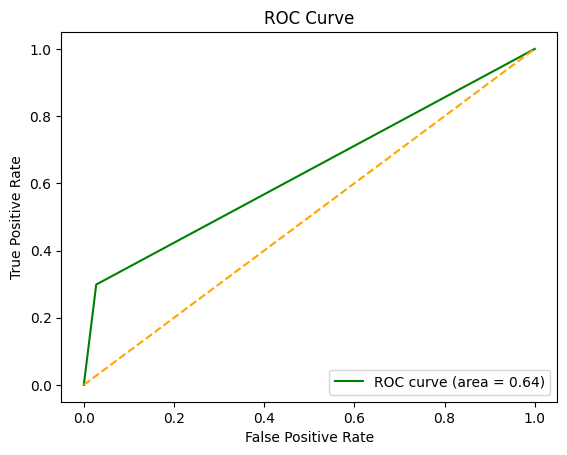

In [15]:
train_predict_evaluate(LogisticRegression(max_iter=100000),X_train,y_train,X_test)

### With Standardization

Accuracy:  0.8616780045351474
Precision:  0.8076923076923077
Recall:  0.2727272727272727
F1 Score:  0.4077669902912621
Confusion Matrix:
 [[359   5]
 [ 56  21]]


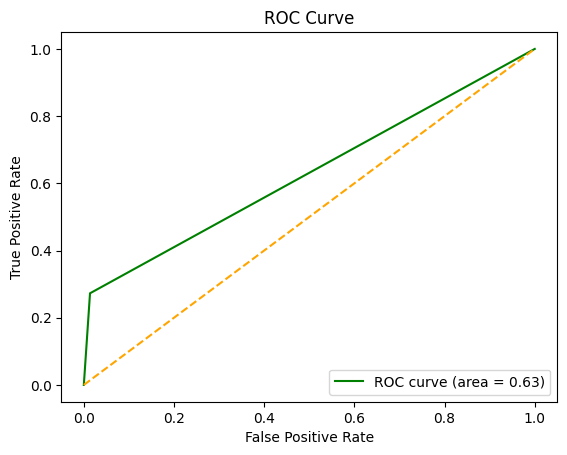

In [16]:
train_predict_evaluate(LogisticRegression(max_iter=100000,C=0.001,penalty='l2',solver='liblinear'),X_train_standardized,y_train,X_test_standardized)

### With Normalization

Accuracy:  0.8594104308390023
Precision:  0.7142857142857143
Recall:  0.3246753246753247
F1 Score:  0.44642857142857145
Confusion Matrix:
 [[354  10]
 [ 52  25]]


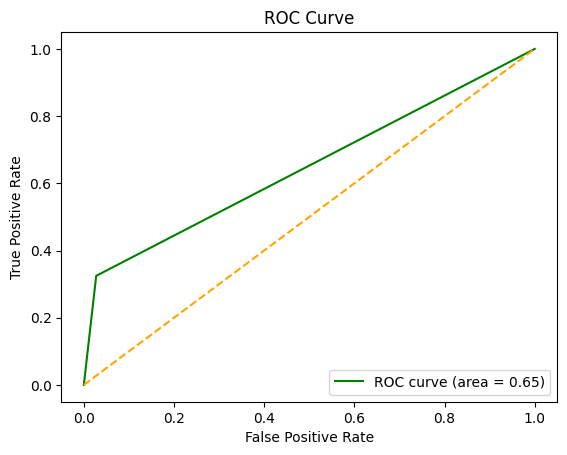

In [17]:
train_predict_evaluate(LogisticRegression(max_iter=100000,C=100,penalty='l1',solver='liblinear'),X_train_normalized,y_train,X_test_normalized)

# K-Fold Cross Validation

In [18]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics

In [19]:
metrics = []

### Without Scaling

In [20]:
metrics.append(cross_validation(LogisticRegression(max_iter=100000),X,y))

c:\Users\mikku\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mikku\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Accuracy:  0.8653061224489795
Precision:  0.6778107416879795
Recall:  0.3205673758865248
F1 Score:  0.43331593824744513


c:\Users\mikku\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### With Standardization

In [21]:
metrics.append(cross_validation(LogisticRegression(max_iter=100000,C=0.001,penalty='l2',solver='liblinear'),X_standardized,y))

Accuracy:  0.8748299319727891
Precision:  0.7529716139879479
Recall:  0.3459219858156028
F1 Score:  0.4717723744376053


### With Normalization

In [22]:
metrics.append(cross_validation(LogisticRegression(max_iter=100000,C=100,penalty='l1',solver='liblinear'),X_normalized,y))

Accuracy:  0.8653061224489796
Precision:  0.668111111111111
Recall:  0.3375886524822695
F1 Score:  0.4458570434646066


# Performance and Comparison Plots

In [23]:
mdf = pd.DataFrame(metrics,columns=["Accuracy","Precision","Recall","F1 Score"],index=["Without Scaling","With Standardization","With Normalization"])
mdf.head()

,Accuracy,Precision,Recall,F1 Score
Without Scaling,0.865306,0.677811,0.320567,0.433316
With Standardization,0.874830,0.752972,0.345922,0.471772
With Normalization,0.865306,0.668111,0.337589,0.445857


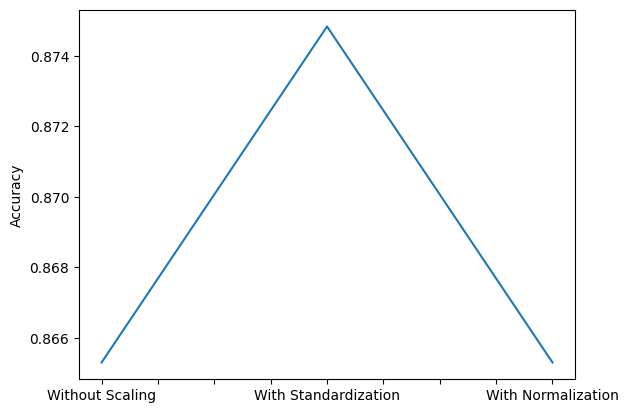

In [24]:
mdf['Accuracy'].plot()
plt.ylabel("Accuracy")
plt.show()

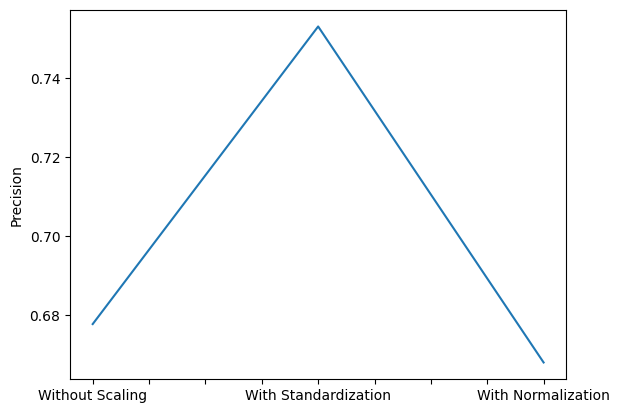

In [25]:
mdf['Precision'].plot()
plt.ylabel("Precision")
plt.show()

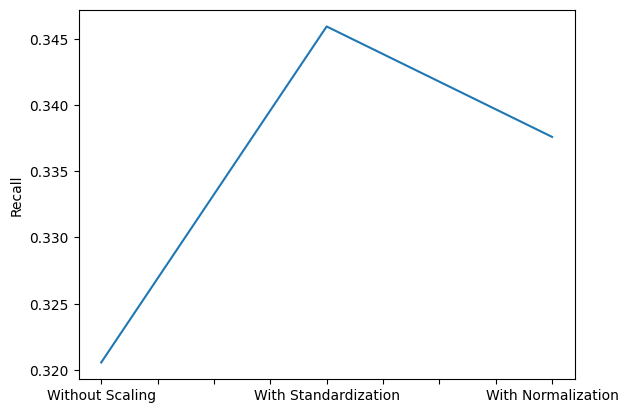

In [26]:
mdf['Recall'].plot()
plt.ylabel("Recall")
plt.show()

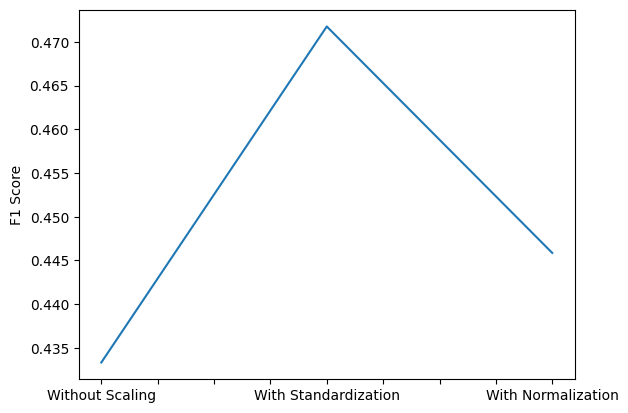

In [27]:
mdf['F1 Score'].plot()
plt.ylabel("F1 Score")
plt.show()